<a href="https://colab.research.google.com/github/jlibleft/TOM-projekt/blob/master/PROJEKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pynrrd
!pip install SimpleITK



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 7.6 MB/s eta 0:00:00


**SPRAWDZANIE ZAKRESU WARTOŚCI PIKSELI**


In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
'''
# Funkcja do segmentacji aorty na podstawie progowania
def threshold_segmentation(image_array, lower_threshold, upper_threshold):
    # Ustaw piksele spoza zakresu na 0, a piksele w zakresie na 1
    segmented_image=np.zeros(image_array.shape)
    segmented_image = np.where((image_array >= lower_threshold) & (image_array <= upper_threshold), 1, 0)
    return segmented_image
'''

def data_load(filepath):
  # Ścieżka do pliku nrrd
  nrrd_file_path = filepath

  # Wczytaj plik nrrd
  image = sitk.ReadImage(nrrd_file_path)

  # Konwertuj obraz do numpy array
  image_array = sitk.GetArrayFromImage(image)

  # Wymiary obrazu
  depth, height, width = image_array.shape

  for slice_index in range(depth):
        slice_2d = image_array[slice_index, :, :]
        min_pixel_value = slice_2d.min()
        max_pixel_value = slice_2d.max()
        pixel_range = (slice_2d.min(), slice_2d.max())
        print(f"Przekrój {slice_index}: Zakres wartości pikseli: {pixel_range}")


  return slice_2d

# Ścieżka do pliku nrrd
nrrd_file_path = "/content/K2.nrrd"
slice_2d=data_load(nrrd_file_path)

'''
# Ustal zakres wartości pikseli dla aorty (dobrane empirycznie)
lower_threshold = 200  # Dolny próg
upper_threshold = 240  # Górny próg

# Wywołaj funkcję segmentacji
segmented_image = threshold_segmentation(slice_2d, lower_threshold, upper_threshold)

# Wyświetl oryginalny przekrój CT i segmentowaną aortę
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(slice_2d, cmap='gray')
plt.title('Oryginalny przekrój CT')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmentowana aorta')
plt.axis('off')

plt.show()


slice_index=120
# Wyświetl przekrój 2D
plt.imshow(slice_2d, cmap='gray')
plt.axis('off')
plt.title('Przekrój 2D - Indeks: 120')
plt.show()
'''

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:105:
sitk::ERROR: Unable to determine ImageIO reader for "/content/K2.nrrd"

KeyboardInterrupt: 

TypeError: Invalid shape (512,) for image data

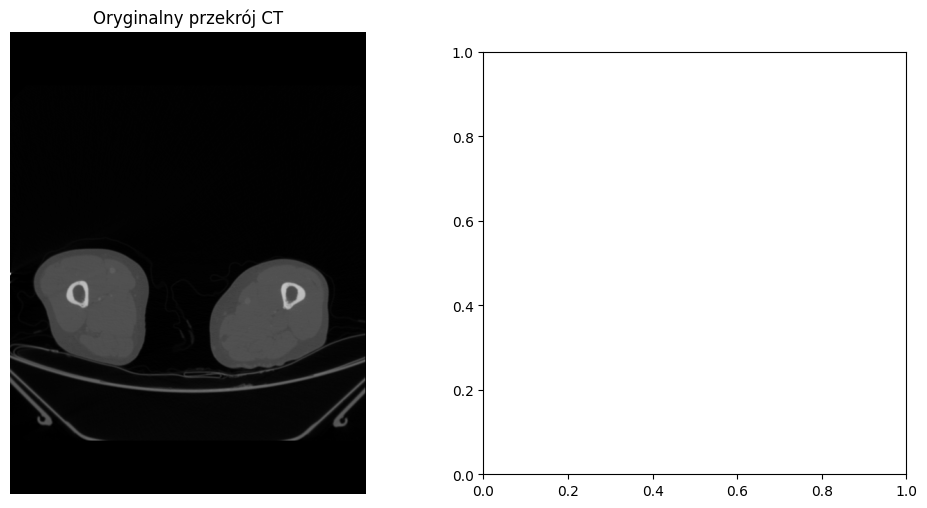

In [ ]:
import matplotlib.pyplot as plt

# Funkcja do segmentacji aorty na podstawie progowania
def threshold_segmentation(image_array, lower_threshold, upper_threshold):
    # Ustaw piksele spoza zakresu na 0, a piksele w zakresie na 1
    segmented_image = np.where((image_array >= lower_threshold) & (image_array <= upper_threshold), 1, 0)
    return segmented_image



# Ustal zakres wartości pikseli dla aorty (dobrane empirycznie)
lower_threshold = 100  # Dolny próg
upper_threshold = 500  # Górny próg

# Wywołaj funkcję segmentacji
segmented_image = threshold_segmentation(slice_2d, lower_threshold, upper_threshold)

# Wyświetl oryginalny przekrój CT i segmentowaną aortę
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_array[0], cmap='gray')
plt.title('Oryginalny przekrój CT')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image[0], cmap='gray')
plt.title('Segmentowana aorta')
plt.axis('off')

plt.show()